<a href="https://colab.research.google.com/github/AliKhyar/Machine-Learning-stuff/blob/master/KerasRegressionAssessement2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [23]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [24]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                1030 non-null float64
Blast Furnace Slag    1030 non-null float64
Fly Ash               1030 non-null float64
Water                 1030 non-null float64
Superplasticizer      1030 non-null float64
Coarse Aggregate      1030 non-null float64
Fine Aggregate        1030 non-null float64
Age                   1030 non-null int64
Strength              1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [25]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [26]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [0]:
concrete_data_cols = concrete_data.columns
predictors = concrete_data[concrete_data_cols[concrete_data_cols != 'Strength']]
target = concrete_data[['Strength']]

In [28]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [29]:
target.head()

,Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [30]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [0]:
n_cols = predictors_norm.shape[1]

In [0]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(loss='mse',optimizer='adam', metrics=['mse'])
    return model

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    predictors_norm, target, test_size=0.30, random_state=42)

In [0]:
model = regression_model()

In [35]:
h = model.fit(X_train, y_train, epochs=50, verbose=2)


Epoch 1/50
 - 0s - loss: 1628.5777 - mean_squared_error: 1628.5777
Epoch 2/50
 - 0s - loss: 1612.1803 - mean_squared_error: 1612.1803
Epoch 3/50
 - 0s - loss: 1597.0191 - mean_squared_error: 1597.0191
Epoch 4/50
 - 0s - loss: 1581.9818 - mean_squared_error: 1581.9818
Epoch 5/50
 - 0s - loss: 1567.6851 - mean_squared_error: 1567.6851
Epoch 6/50
 - 0s - loss: 1553.2230 - mean_squared_error: 1553.2230
Epoch 7/50
 - 0s - loss: 1538.8179 - mean_squared_error: 1538.8179
Epoch 8/50
 - 0s - loss: 1524.1742 - mean_squared_error: 1524.1742
Epoch 9/50
 - 0s - loss: 1508.8457 - mean_squared_error: 1508.8457
Epoch 10/50
 - 0s - loss: 1492.9414 - mean_squared_error: 1492.9414
Epoch 11/50
 - 0s - loss: 1476.3903 - mean_squared_error: 1476.3903
Epoch 12/50
 - 0s - loss: 1459.0208 - mean_squared_error: 1459.0208
Epoch 13/50
 - 0s - loss: 1440.3540 - mean_squared_error: 1440.3540
Epoch 14/50
 - 0s - loss: 1421.0517 - mean_squared_error: 1421.0517
Epoch 15/50
 - 0s - loss: 1400.7781 - mean_squared_error:

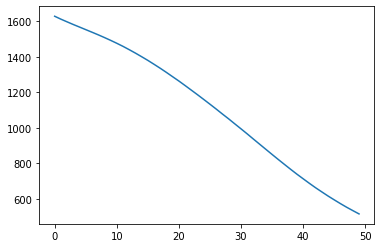

In [36]:
plt.plot(h.history['mean_squared_error'])